## Import all neccessaries libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the csv file

In [10]:
titanic_df = pd.read_csv('titanic.csv')

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
titanic_df.shape

(891, 12)

## Exploratory Data Analysis

Why Do EDA
Model Building
Analysis and Reporting
Validate Assumptions
Handling Missing Values
Feature Engineering
Detecting Outliers

In [ ]:
Column Types:-
Numerical:- PassengerId,Age,Fare
Categorical:- Survived,Pclass,Sex,SibSp,Cabin,Embarked
Mixed:- Name,Ticket,Cabin

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Age Column

In [17]:
# Around 20% of data is missing for Age column
titanic_df['Age'].isna().sum() / len(titanic_df['Age'])

0.19865319865319866

In [18]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

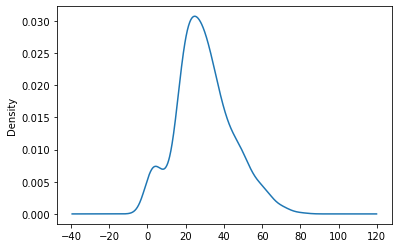

In [19]:
titanic_df['Age'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

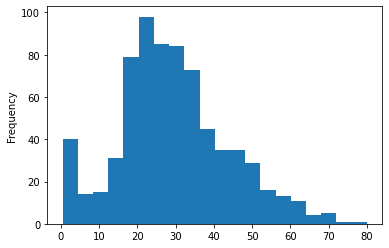

In [22]:
titanic_df['Age'].plot(kind='hist',bins=20)

In [24]:
titanic_df['Age'].skew()

0.38910778230082704

## Fare Column

In [28]:
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Density'>

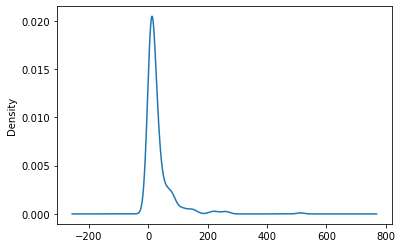

In [29]:
titanic_df['Fare'].plot(kind='kde')

In [30]:
titanic_df['Fare'].skew()

4.787316519674893

<AxesSubplot:ylabel='Frequency'>

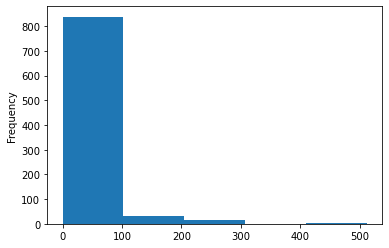

In [34]:
titanic_df['Fare'].plot(kind='hist',bins=5)

<AxesSubplot:>

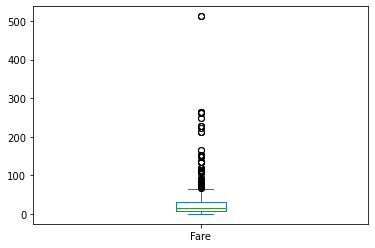

In [35]:
titanic_df['Fare'].plot(kind='box')

In [42]:
titanic_df[titanic_df['Fare'] >200].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [40]:
titanic_df[titanic_df['Fare'] >200].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
dtype: int64

In [41]:
len(titanic_df[titanic_df['Fare'] >200])

20

## Embarked Column

In [43]:
titanic_df['Embarked'].count()

889

In [44]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

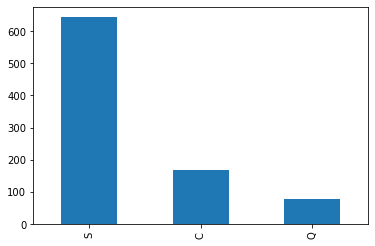

In [45]:
titanic_df['Embarked'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Embarked'>

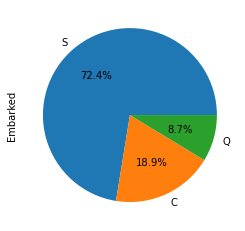

In [49]:
titanic_df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

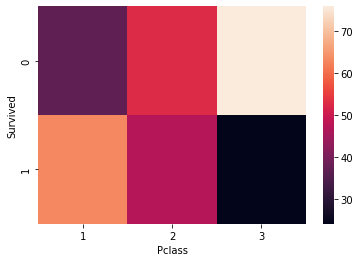

In [50]:
sns.heatmap(pd.crosstab(titanic_df['Survived'],titanic_df['Pclass'],normalize='columns')*100)

In [52]:
pd.crosstab(titanic_df['Survived'],titanic_df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [53]:
pd.crosstab(titanic_df['Survived'],titanic_df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<AxesSubplot:ylabel='Density'>

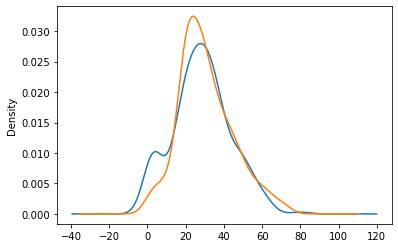

In [56]:
titanic_df[titanic_df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
titanic_df[titanic_df['Survived'] == 0]['Age'].plot(kind='kde',label='Non Survived')


In [58]:
#titanic_df[titanic_df['Survived'] == 1]['Sex'].plot(kind='kde')
#titanic_df[titanic_df['Survived'] == 0]['Sex'].plot(kind='kde')

<AxesSubplot:xlabel='Survived', ylabel='count'>

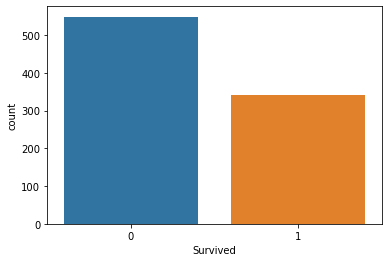

In [68]:
sns.countplot(data=titanic_df,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

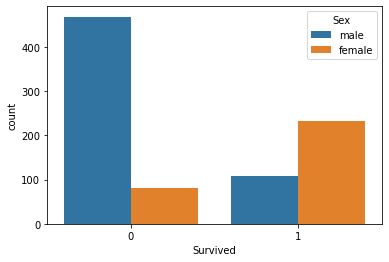

In [69]:
sns.countplot(data=titanic_df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

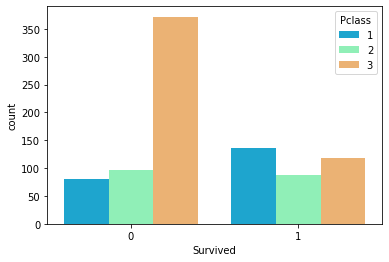

In [70]:
sns.countplot(data=titanic_df,x='Survived',hue='Pclass',palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

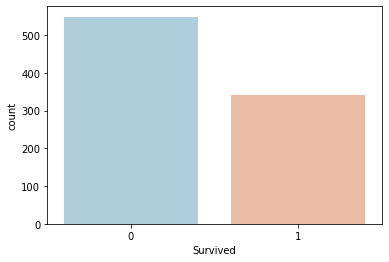

In [72]:
sns.countplot(data=titanic_df,x='Survived',palette='RdBu_r')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

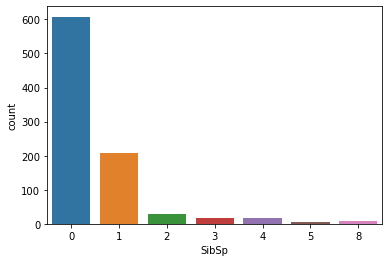

In [73]:
sns.countplot(x='SibSp',data=titanic_df)

<AxesSubplot:>

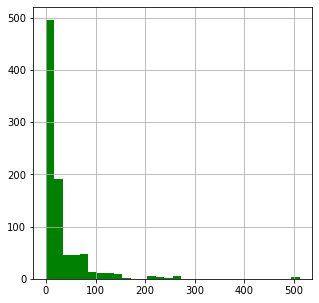

In [77]:
titanic_df['Fare'].hist(color='green',bins=30,figsize=(5,5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

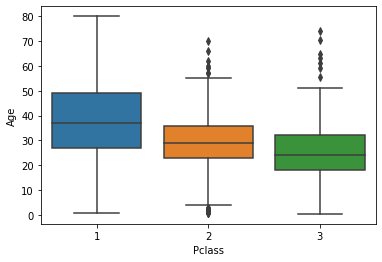

In [78]:
sns.boxplot(data=titanic_df,x='Pclass',y='Age')

In [ ]:
Now need too handle the missing age data, As shown in above plot we can replace the mean with null value

In [80]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].sum()/len(titanic_df[titanic_df['Pclass']==1])

32.92324074074074

In [81]:
titanic_df.groupby('Pclass')

In [82]:
titanic_df.groupby('Pclass')['Age']

In [83]:
titanic_df.groupby('Pclass')['Age'].sum()

Pclass
1    7111.42
2    5168.83
3    8924.92
Name: Age, dtype: float64

In [86]:
titanic_df.groupby('Pclass')['Age'].sum()

Pclass
1    7111.42
2    5168.83
3    8924.92
Name: Age, dtype: float64

In [88]:
titanic_df.groupby('Pclass')['Age'].agg('mean')

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [89]:
len(titanic_df[titanic_df['Pclass'] == 1])

216

In [90]:
len(titanic_df[titanic_df['Pclass'] == 2])

184

In [91]:
len(titanic_df[titanic_df['Pclass'] == 3])

491

In [96]:
def age_missing(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [97]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(age_missing,axis=1)

In [98]:
titanic_df['Age'].count()

891

In [99]:
titanic_df['Age'].isnull().sum()

0

In [100]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [102]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [103]:
titanic_df.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [105]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [106]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [109]:
titanic_df['Age'] = titanic_df['Age'].astype('int64')

In [110]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [111]:
titanic_df.drop('PassengerId',axis=1,inplace=True)

In [112]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [114]:
Sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
Embarked = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [115]:
titanic_df.drop(columns=['Sex','Embarked'],axis=1,inplace=True)

In [116]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7.2500
1,1,1,38,1,0,71.2833
2,1,3,26,0,0,7.9250
3,1,1,35,1,0,53.1000
4,0,3,35,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000
887,1,1,19,0,0,30.0000
888,0,3,25,1,2,23.4500
889,1,1,26,0,0,30.0000


In [117]:
titanic_df = pd.concat([titanic_df,Sex,Embarked],axis=1)

In [118]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,1,Q,S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,25,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


In [119]:
X = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']


In [120]:
X

,Pclass,Age,SibSp,Parch,Fare,1,Q,S
0,3,22,1,0,7.2500,1,0,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,0,1
3,1,35,1,0,53.1000,0,0,1
4,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1
887,1,19,0,0,30.0000,0,0,1
888,3,25,1,2,23.4500,0,0,1
889,1,26,0,0,30.0000,1,0,0


In [121]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
prediction = LogReg.predict(X_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       159
           1       0.80      0.67      0.73       109

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [129]:
print(confusion_matrix(y_test,prediction))

[[141  18]
 [ 36  73]]


In [130]:
print(accuracy_score(y_test,prediction))

0.7985074626865671


In [ ]:
precision = TP/TP+FP

In [ ]:
recall = TP/TP+FN

In [ ]:
f1-score = 2*precision*recall/precision + recall

In [ ]:
if TP are important then check for precision

In [ ]:
if FP are important then check for recall